#Importing Libraries

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

#Loading the Datasets and Preprocessing

In [9]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Initialize Neural Network

In [10]:
input_layer_size = X_train.shape[1]
hidden_layer_size = 5
output_layer_size = y_train.shape[1]

np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)

learning_rate = 0.01
iterations = 1000

#Backpropagation Neural Network

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

errors = []
accuracies = []

for iteration in range(iterations):
    # Feedforward
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    final_layer_output = sigmoid(final_layer_input)

    # Mean Squared Error
    error = y_train - final_layer_output
    mean_squared_error = np.mean(np.square(error))
    errors.append(mean_squared_error)

    # Backpropagation
    final_layer_delta = error * sigmoid_derivative(final_layer_output)
    hidden_layer_error = final_layer_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(final_layer_delta) * learning_rate
    weights_input_hidden += X_train.T.dot(hidden_layer_delta) * learning_rate

    # Accuracy
    predictions = np.argmax(final_layer_output, axis=1)
    targets = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == targets)
    accuracies.append(accuracy)

    if iteration % 100 == 0:
        print(f"Iteration {iteration}: MSE={mean_squared_error:.4f}, Accuracy={accuracy:.4f}")

Iteration 0: MSE=0.2911, Accuracy=0.1905
Iteration 100: MSE=0.1308, Accuracy=0.6476
Iteration 200: MSE=0.1111, Accuracy=0.9429
Iteration 300: MSE=0.0834, Accuracy=0.9619
Iteration 400: MSE=0.0716, Accuracy=0.9143
Iteration 500: MSE=0.0514, Accuracy=0.9333
Iteration 600: MSE=0.0392, Accuracy=0.9429
Iteration 700: MSE=0.0326, Accuracy=0.9524
Iteration 800: MSE=0.0284, Accuracy=0.9524
Iteration 900: MSE=0.0254, Accuracy=0.9524


#Plotting Error and Accuracy Graphs


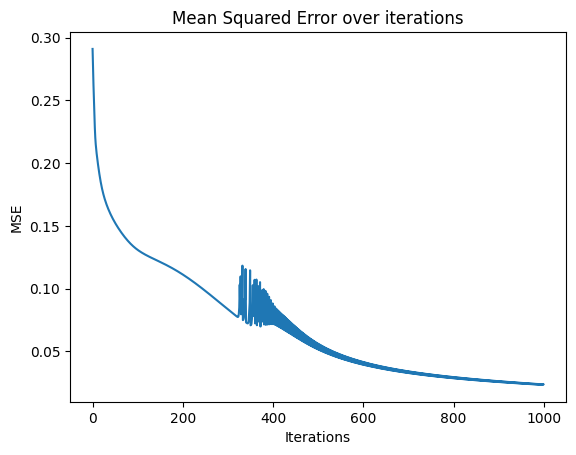

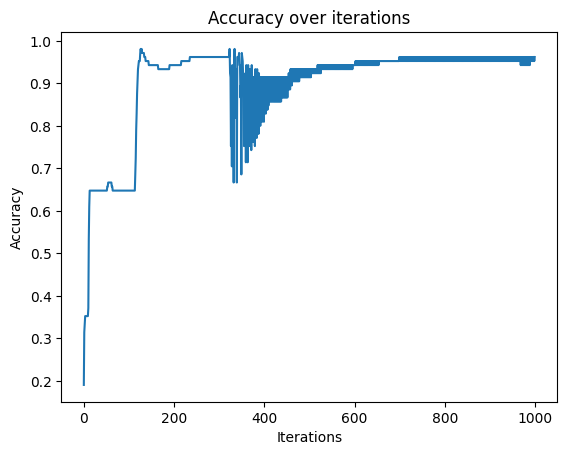

In [12]:
plt.plot(errors)
plt.title("Mean Squared Error over iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

plt.plot(accuracies)
plt.title("Accuracy over iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

#Prediction for test data

In [13]:
hidden_layer_input_test = np.dot(X_test, weights_input_hidden)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

final_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output)
final_layer_output_test = sigmoid(final_layer_input_test)

test_predictions = np.argmax(final_layer_output_test, axis=1)
test_targets = np.argmax(y_test, axis=1)

test_accuracy = np.mean(test_predictions == test_targets)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9556


#Conclusion

The above code demonstrates the implementation of a backpropagation algorithm for a neural network from scratch using the Iris dataset. Through iterative training, the network adjusts its weights to minimize the error and improve prediction accuracy. The final results show the model's ability to classify test data with a decent level of accuracy, validating the effectiveness of backpropagation in supervised learning tasks.